<a href="https://colab.research.google.com/github/JunheeChoi/coding_practice/blob/main/%EC%BD%94%EB%94%A9%ED%85%8C%EC%8A%A4%ED%8A%B8_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보통의 취준생을 위한 코딩테스트 with Python

## 3장 카카오톡의 오픈채팅방은 무슨 알고리즘으로 구현할까?

### 3-2 2020년 카카오 개발자 신입 공개 채용 1차 1번 오픈채팅방 문제
https://school.programmers.co.kr/learn/courses/30/lessons/42888

오픈채팅방
카카오톡 오픈채팅방에서는 친구가 아닌 사람들과 대화를 할 수 있는데, 본래 닉네임이 아닌 가상의 닉네임을 사용하여 채팅방에 들어갈 수 있다.

신입사원인 김크루는 카카오톡 오픈 채팅방을 개설한 사람을 위해, 다양한 사람들이 들어오고, 나가는 것을 지켜볼 수 있는 관리자창을 만들기로 했다. 채팅방에 누군가 들어오면 다음 메시지가 출력된다.

"[닉네임]님이 들어왔습니다."

채팅방에서 누군가 나가면 다음 메시지가 출력된다.

"[닉네임]님이 나갔습니다."

채팅방에서 닉네임을 변경하는 방법은 다음과 같이 두 가지이다.

채팅방을 나간 후, 새로운 닉네임으로 다시 들어간다.
채팅방에서 닉네임을 변경한다.
닉네임을 변경할 때는 기존에 채팅방에 출력되어 있던 메시지의 닉네임도 전부 변경된다.

예를 들어, 채팅방에 "Muzi"와 "Prodo"라는 닉네임을 사용하는 사람이 순서대로 들어오면 채팅방에는 다음과 같이 메시지가 출력된다.

"Muzi님이 들어왔습니다."
"Prodo님이 들어왔습니다."

채팅방에 있던 사람이 나가면 채팅방에는 다음과 같이 메시지가 남는다.

"Muzi님이 들어왔습니다."
"Prodo님이 들어왔습니다."
"Muzi님이 나갔습니다."

Muzi가 나간후 다시 들어올 때, Prodo 라는 닉네임으로 들어올 경우 기존에 채팅방에 남아있던 Muzi도 Prodo로 다음과 같이 변경된다.

"Prodo님이 들어왔습니다."
"Prodo님이 들어왔습니다."
"Prodo님이 나갔습니다."
"Prodo님이 들어왔습니다."

채팅방은 중복 닉네임을 허용하기 때문에, 현재 채팅방에는 Prodo라는 닉네임을 사용하는 사람이 두 명이 있다. 이제, 채팅방에 두 번째로 들어왔던 Prodo가 Ryan으로 닉네임을 변경하면 채팅방 메시지는 다음과 같이 변경된다.

"Prodo님이 들어왔습니다."
"Ryan님이 들어왔습니다."
"Prodo님이 나갔습니다."
"Prodo님이 들어왔습니다."

채팅방에 들어오고 나가거나, 닉네임을 변경한 기록이 담긴 문자열 배열 record가 매개변수로 주어질 때, 모든 기록이 처리된 후, 최종적으로 방을 개설한 사람이 보게 되는 메시지를 문자열 배열 형태로 return 하도록 solution 함수를 완성하라.



> 제한사항

record는 다음과 같은 문자열이 담긴 배열이며, 길이는 1 이상 100,000 이하이다.

다음은 record에 담긴 문자열에 대한 설명이다.

*   record는 다음과 같은 문자열이 담긴 배열이며, 길이는 1 이상 100,000 이하이다.
*   다음은 record에 담긴 문자열에 대한 설명이다.

모든 유저는 [유저 아이디]로 구분한다.

[유저 아이디] 사용자가 [닉네임]으로 채팅방에 입장 - "Enter [유저 아이디] [닉네임]" (ex. "Enter uid1234 Muzi")

[유저 아이디] 사용자가 채팅방에서 퇴장 - "Leave [유저 아이디]" (ex. "Leave uid1234")

[유저 아이디] 사용자가 닉네임을 [닉네임]으로 변경 - "Change [유저 아이디] 
[닉네임]" (ex. "Change uid1234 Muzi")

첫 단어는 Enter, Leave, Change 중 하나이다.

각 단어는 공백으로 구분되어 있으며, 알파벳 대문자, 소문자, 숫자로만 이루어져있다.

유저 아이디와 닉네임은 알파벳 대문자, 소문자를 구별한다.

유저 아이디와 닉네임의 길이는 1 이상 10 이하이다.

채팅방에서 나간 유저가 닉네임을 변경하는 등 잘못 된 입력은 주어지지 않는다.

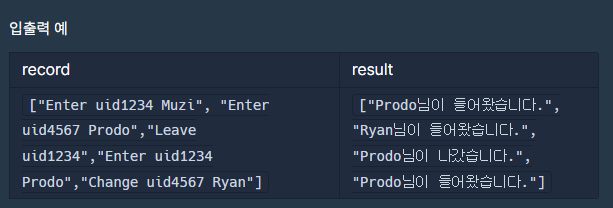

In [1]:
# 닉네임은 중복되지만 유저 아이디는 중복되지 않으며 입력 record가 주어졌을 때 record의 문자열을 차례대로 처리하여 마지막 결과 상태를 나타내면 되는 문제
def solution(record):
    answer = []
    trace = []
    Map = {}   # key, value가 있는 dictionary 구조

    for i in range(len(record)):
        temp = record[i].split(' ')    # 문자열 파싱

        if temp[0] == 'Enter':    # 명령어가 enter인 경우
            Map[temp[1]] = temp[2]    # Map의 key 유저 아이디의 value값을 닉네임으로 설정
            trace.append([temp[0], temp[1]])    # Enter가 입력된 순서 기록
        elif temp[0] == 'Leave':    # 명령어가 Leave인 경우
            trace.append([temp[0], temp[1]])    # 명령어 leave가 입력된 순서 기록
        else : Map[temp[1]] = temp[2]   # 명령어가 Change인 경우 Map의 key유저 아이디의 value값을 닉네임으로 설정


    for i in range(len(trace)):    # 명령어가 입력된 순서를 기록한 곳을 보며
        if trace[i][0] == 'Enter':  # 기록된 명령어가 Enter인 경우
            result = Map[trace[i][1]] + "님이 들어왔습니다."    # Map의 key유저 아이디의 value값(닉네임) + "님이 들어왔습니다."를 출력
            answer.append(result)
        else:                       # 기록된 명령어가 Leave인 경우
            result = Map[trace[i][1]] + "님이 나갔습니다."    # Map의 key유저 아이디의 value값(닉네임) + "님이 나갔습니다 출력"
            answer.append(result)

    return answer

In [2]:
solution(["Enter uid8979 muzii", "Change uid8979 prodo", "Enter uid3333 Ryan", "Leave uid8979 prodo"])

['prodo님이 들어왔습니다.', 'Ryan님이 들어왔습니다.', 'prodo님이 나갔습니다.']

### 카카오 신입 개발자 블라인드 채용 : 인프라 분야/프로그래밍 분야
#### 1. 인프라 분야
* 인프라의 구성요소
1.   하드웨어 : 서버 장비 본체 혹은 데이터를 저장하기 위한 장치
2.   네트워크 : 사용자와 사용자를 연결하는 도구들 ex) 라우터, 브릿지, 허브 등
3. 운영체제 : 하드웨어와 소프트웨어 제어, 사용자가 쉽게 컴퓨터를 쓰도록 하는 프로그램 ex) 윈도우즈, 맥OS, 리눅스
4. 미들웨어 : 운영체제와 애플리케이션 중간에서 도움을 주는 소프트웨어 ex) mySQL, 아파치 HTTP 서버

* 세부 업무
1. System Engineer
2. Network Engineer
3. DBA
4. Data Architect
5. Hadoop Engineer


#### 2. 프로그래밍 분야
* 서버 분야
1. 카카오톡, 다음, 멜론, 소셜 등 서비스 개발
2. 비즈니스 플랫폼 개발
3. 클라우드 플랫폼/지도 플랫폼/개발 도구 개발

* 클라이언트 분야
1. Android/iOS 앱 개발
2. Front-End 개발

* 데이터 분야
1. 데이터 엔지니어링
2. 데이터 사이언스



## 제4장 구현의 달인, 삼성 코딩 테스트

### 4-1 삼성 개발자 신입 공개 채용 과정
* S/W 역량 테스트(=코딩 테스트)
* 면접 : 기술 면접, 인성 면접, 창의 면접


### 4-2 삼성의 주력 서비스


> 삼성전자, 삼성디스플레이, 삼성생명, 삼성SDS, 삼성SDI, 삼성전기, 삼성카드 등
* 긴 코드를 구현할 능력이 있으며, 정확하게 구현해나가는 사람 필요
* 완전 탐색 알고리즘, 백트래킹알고리즘, 그래프 이론 등, 그 외 동적 프로그래밍, 그리디 알고리즘 등 출제


### 4-3 삼성 S/W 역량 테스트 A형 기출 문제
치킨 배달

* 문제

크기가 N×N인 도시가 있다. 도시는 1×1크기의 칸으로 나누어져 있다. 도시의 각 칸은 빈 칸, 치킨집, 집 중 하나이다. 도시의 칸은 (r, c)와 같은 형태로 나타내고, r행 c열 또는 위에서부터 r번째 칸, 왼쪽에서부터 c번째 칸을 의미한다. r과 c는 1부터 시작한다.

이 도시에 사는 사람들은 치킨을 매우 좋아한다. 따라서, 사람들은 "치킨 거리"라는 말을 주로 사용한다. 치킨 거리는 집과 가장 가까운 치킨집 사이의 거리이다. 즉, 치킨 거리는 집을 기준으로 정해지며, 각각의 집은 치킨 거리를 가지고 있다. 도시의 치킨 거리는 모든 집의 치킨 거리의 합이다.

임의의 두 칸 (r1, c1)과 (r2, c2) 사이의 거리는 |r1-r2| + |c1-c2|로 구한다.

예를 들어, 아래와 같은 지도를 갖는 도시를 살펴보자.

0 2 0 1 0

1 0 1 0 0

0 0 0 0 0

0 0 0 1 1

0 0 0 1 2

0은 빈 칸, 1은 집, 2는 치킨집이다.

(2, 1)에 있는 집과 (1, 2)에 있는 치킨집과의 거리는 |2-1| + |1-2| = 2, (5, 5)에 있는 치킨집과의 거리는 |2-5| + |1-5| = 7이다. 따라서, (2, 1)에 있는 집의 치킨 거리는 2이다.

(5, 4)에 있는 집과 (1, 2)에 있는 치킨집과의 거리는 |5-1| + |4-2| = 6, (5, 5)에 있는 치킨집과의 거리는 |5-5| + |4-5| = 1이다. 따라서, (5, 4)에 있는 집의 치킨 거리는 1이다.

이 도시에 있는 치킨집은 모두 같은 프랜차이즈이다. 프렌차이즈 본사에서는 수익을 증가시키기 위해 일부 치킨집을 폐업시키려고 한다. 오랜 연구 끝에 이 도시에서 가장 수익을 많이 낼 수 있는  치킨집의 개수는 최대 M개라는 사실을 알아내었다.

도시에 있는 치킨집 중에서 최대 M개를 고르고, 나머지 치킨집은 모두 폐업시켜야 한다. 어떻게 고르면, 도시의 치킨 거리가 가장 작게 될지 구하는 프로그램을 작성하시오.

* 입력

첫째 줄에 N(2 ≤ N ≤ 50)과 M(1 ≤ M ≤ 13)이 주어진다.

둘째 줄부터 N개의 줄에는 도시의 정보가 주어진다.

도시의 정보는 0, 1, 2로 이루어져 있고, 0은 빈 칸, 1은 집, 2는 치킨집을 의미한다. 집의 개수는 2N개를 넘지 않으며, 적어도 1개는 존재한다. 치킨집의 개수는 M보다 크거나 같고, 13보다 작거나 같다.

* 출력

첫째 줄에 폐업시키지 않을 치킨집을 최대 M개를 골랐을 때, 도시의 치킨 거리의 최솟값을 출력한다.

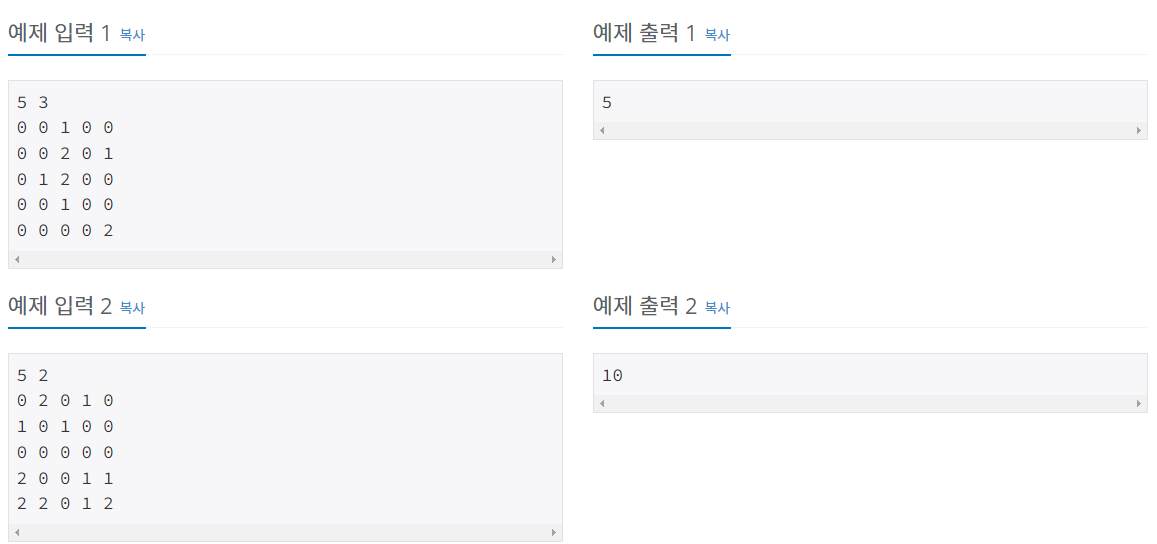

